# Take-home Final Exam


###Produce descriptive statistics of all variables including missing values. Identify predictors that may help predict MIS_Status using descriptive statistics and visualization. How is the outcome variable MIS_Status distributed?


In [52]:
%pip install dmba

In [53]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve, precision_score, recall_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
import math
from scipy.stats import chi2


DATA = Path('/content/sample_data/')
sba_df = pd.read_csv(DATA / 'SBAcase.11.13.17.csv')


In [66]:
sba_df.shape

(2102, 35)

In [67]:
sba_df.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


In [68]:
sba_df.columns

Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'New', 'RealEstate', 'Portion', 'Recession',
       'daysterm', 'xx', 'Default'],
      dtype='object')

In [69]:
sba_df.columns = [s.strip().replace(' ', '_') for s in sba_df.columns]
sba_df.columns

Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'New', 'RealEstate', 'Portion', 'Recession',
       'daysterm', 'xx', 'Default'],
      dtype='object')

In [76]:
sba_df.describe(include='all')

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
count,2102.000000,2.102000e+03,2082,2102,2102,2102.000000,2099,2099,2102.000000,2102.000000,...,2.102000e+03,2.102000e+03,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2099.000000,2102.000000
unique,NaN,NaN,1986,519,1,NaN,154,21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,SUPER VIDEO,LOS ANGELES,CA,NaN,BANK OF AMERICA NATL ASSOC,CA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3,162,2102,NaN,345,985,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.500000,4.469172e+09,NaN,NaN,NaN,92698.612274,NaN,NaN,531630.902950,16179.587060,...,2.002908e+04,2.330641e+05,1.891759e+05,0.154139,0.274500,0.671055,0.068506,3809.414843,20076.896141,0.326356
std,0.500119,2.530069e+09,NaN,NaN,NaN,1878.208435,NaN,NaN,521.836986,1454.931276,...,7.543229e+04,3.436310e+05,2.989268e+05,0.361168,0.446368,0.186519,0.252673,2813.968318,2854.510377,0.468991
min,0.000000,1.004285e+09,NaN,NaN,NaN,65757.000000,NaN,NaN,531110.000000,10554.000000,...,0.000000e+00,4.500000e+03,2.250000e+03,0.000000,0.000000,0.296770,0.000000,0.000000,11524.000000,0.000000
25%,0.000000,2.392978e+09,NaN,NaN,NaN,91402.000000,NaN,NaN,531210.000000,15695.750000,...,0.000000e+00,3.000000e+04,1.500000e+04,0.000000,0.000000,0.500000,0.000000,1800.000000,18316.500000,0.000000
50%,0.500000,3.621730e+09,NaN,NaN,NaN,92559.500000,NaN,NaN,531312.000000,16556.000000,...,0.000000e+00,6.100000e+04,4.168000e+04,0.000000,0.000000,0.500000,0.000000,2520.000000,19270.000000,0.000000
75%,1.000000,6.551607e+09,NaN,NaN,NaN,94127.750000,NaN,NaN,532230.000000,17149.750000,...,1.507350e+04,3.000000e+05,2.397562e+05,0.000000,1.000000,0.850000,0.000000,7200.000000,22335.000000,1.000000


In [82]:
numeric_cols = sba_df.select_dtypes(include=np.number)

pd.DataFrame({'mean':numeric_cols.mean(),
              'sd': numeric_cols.std(),
              'min': numeric_cols.min(),
              'max': numeric_cols.max(),
              'median': numeric_cols.median(),
              'sample_size': len(sba_df),
              'miss.val': numeric_cols.isnull().sum()
              })

,mean,sd,min,max,median,sample_size,miss.val
Selected,5.000000e-01,5.001190e-01,0.000000e+00,1.000000e+00,5.000000e-01,2102,0
LoanNr_ChkDgt,4.469172e+09,2.530069e+09,1.004285e+09,9.958873e+09,3.621730e+09,2102,0
Zip,9.269861e+04,1.878208e+03,6.575700e+04,9.616100e+04,9.255950e+04,2102,0
NAICS,5.316309e+05,5.218370e+02,5.311100e+05,5.331100e+05,5.313120e+05,2102,0
ApprovalDate,1.617959e+04,1.454931e+03,1.055400e+04,1.891100e+04,1.655600e+04,2102,0
ApprovalFY,2.004036e+03,4.006321e+00,1.989000e+03,2.012000e+03,2.005000e+03,2102,0
Term,1.269805e+02,9.379894e+01,0.000000e+00,3.060000e+02,8.400000e+01,2102,0
NoEmp,1.015081e+01,3.440242e+01,0.000000e+00,6.500000e+02,3.000000e+00,2102,0
NewExist,1.153736e+00,3.620992e-01,0.000000e+00,2.000000e+00,1.000000e+00,2102,1
CreateJob,2.549952e+00,8.010175e+00,0.000000e+00,1.300000e+02,0.000000e+00,2102,0


### Identify predictors that may help predict MIS_Status using descriptive statistics and visualization. How is the outcome variable MIS_Status distributed?

,count
MIS_Status,
P I F,1416
CHGOFF,686


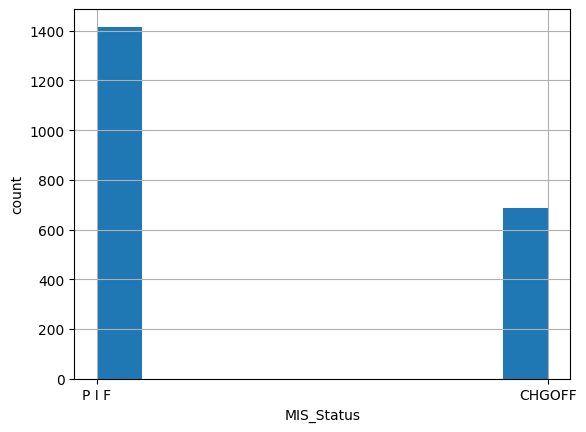

In [86]:
# distribution of the outcome variable MIS_Status
display(sba_df['MIS_Status'].value_counts())

# Visualize the distribution of MIS_Status
ax = sba_df.MIS_Status.hist()
ax.set_xlabel('MIS_Status')
ax.set_ylabel('count')
plt.show()

In [90]:
display(pd.crosstab(sba_df['Zip'], sba_df['MIS_Status']))

MIS_Status,CHGOFF,P I F
Zip,,
65757,1,0
81301,0,1
82037,1,0
85008,0,1
90001,1,0
...,...,...
96093,0,3
96120,0,1
96130,0,1


In [91]:
display(pd.crosstab(sba_df['RealEstate'], sba_df['MIS_Status']))

MIS_Status,CHGOFF,P I F
RealEstate,,
0,660,865
1,26,551


In [92]:
display(pd.crosstab(sba_df['Recession'], sba_df['MIS_Status']))

MIS_Status,CHGOFF,P I F
Recession,,
0,607,1351
1,79,65


In [75]:
sba_df.isna().sum()

,0
Selected,0
LoanNr_ChkDgt,0
Name,20
City,0
State,0
Zip,0
Bank,3
BankState,3
NAICS,0
ApprovalDate,0
